In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
file_path = '/content/Amazon Sale Report.csv'
df = pd.read_csv(file_path)

In [ ]:
df['Date'] = df['Date'].str.strip()
df['Date'] = pd.to_datetime(df['Date'], format='%m-%d-%y', errors='coerce')

In [ ]:
df_cleaned = df.dropna(subset=['Date'])

In [ ]:
daily_sales_cleaned = df_cleaned.groupby('Date')['Amount'].sum().reset_index()

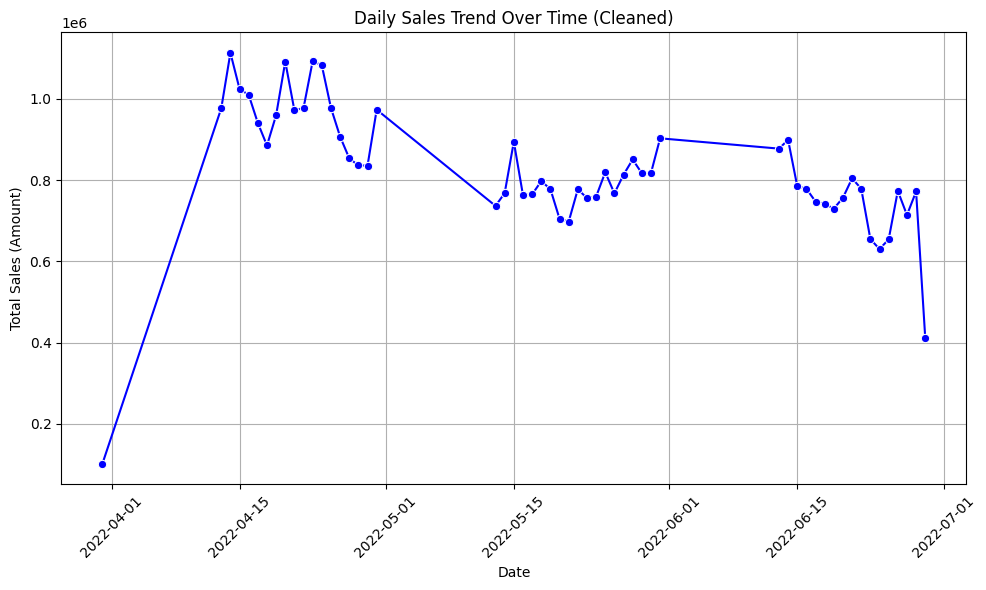

In [ ]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=daily_sales_cleaned, x='Date', y='Amount', marker='o', color='blue')
plt.title('Daily Sales Trend Over Time (Cleaned)')
plt.xlabel('Date')
plt.ylabel('Total Sales (Amount)')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
category_sales = df_cleaned.groupby('Category')['Amount'].sum().reset_index()
category_sales = category_sales.sort_values(by='Amount', ascending=False)

<ipython-input-11-c2c33fb0daed>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=category_sales, x='Amount', y='Category', palette='viridis')


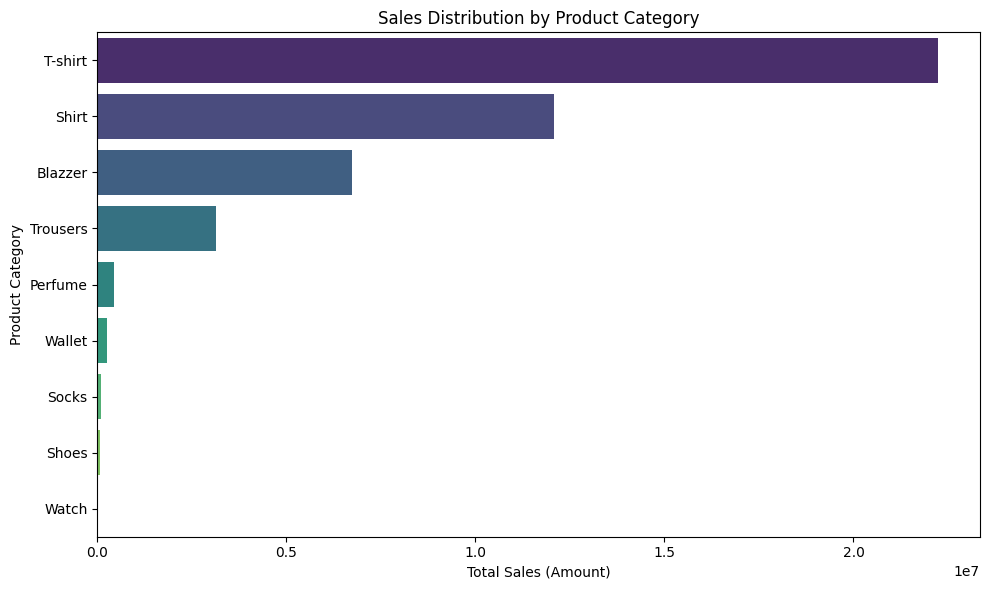

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(data=category_sales, x='Amount', y='Category', palette='viridis')
plt.title('Sales Distribution by Product Category')
plt.xlabel('Total Sales (Amount)')
plt.ylabel('Product Category')
plt.tight_layout()
plt.show()

In [ ]:
fulfillment_analysis = df_cleaned.groupby(['Fulfilment', 'Status'])['Amount'].sum().unstack().fillna(0)

<Figure size 1000x600 with 0 Axes>

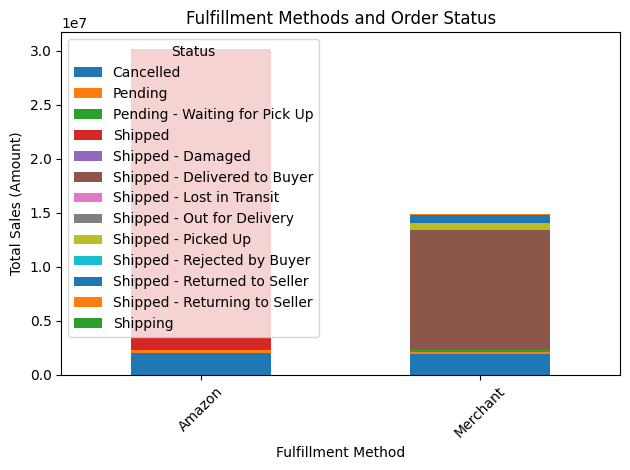

In [ ]:
plt.figure(figsize=(10, 6))
fulfillment_analysis.plot(kind='bar', stacked=True)
plt.title('Fulfillment Methods and Order Status')
plt.xlabel('Fulfillment Method')
plt.ylabel('Total Sales (Amount)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
customer_segmentation = df_cleaned.groupby(['ship-city', 'Sales Channel'])['Amount'].sum().reset_index()
top_cities = customer_segmentation.sort_values(by='Amount', ascending=False).head(10)

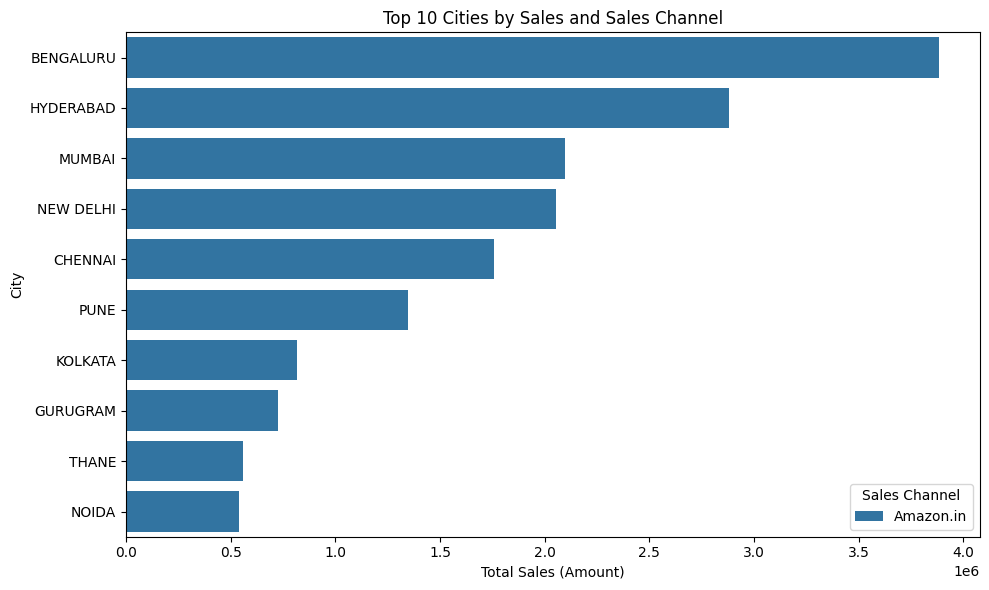

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(data=top_cities, x='Amount', y='ship-city', hue='Sales Channel')
plt.title('Top 10 Cities by Sales and Sales Channel')
plt.xlabel('Total Sales (Amount)')
plt.ylabel('City')
plt.tight_layout()
plt.show()

In [ ]:
state_sales = df_cleaned.groupby('ship-state')['Amount'].sum().reset_index()
state_sales = state_sales.sort_values(by='Amount', ascending=False)

<ipython-input-17-cded7796817c>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=top_states, x='Amount', y='ship-state', palette='coolwarm')


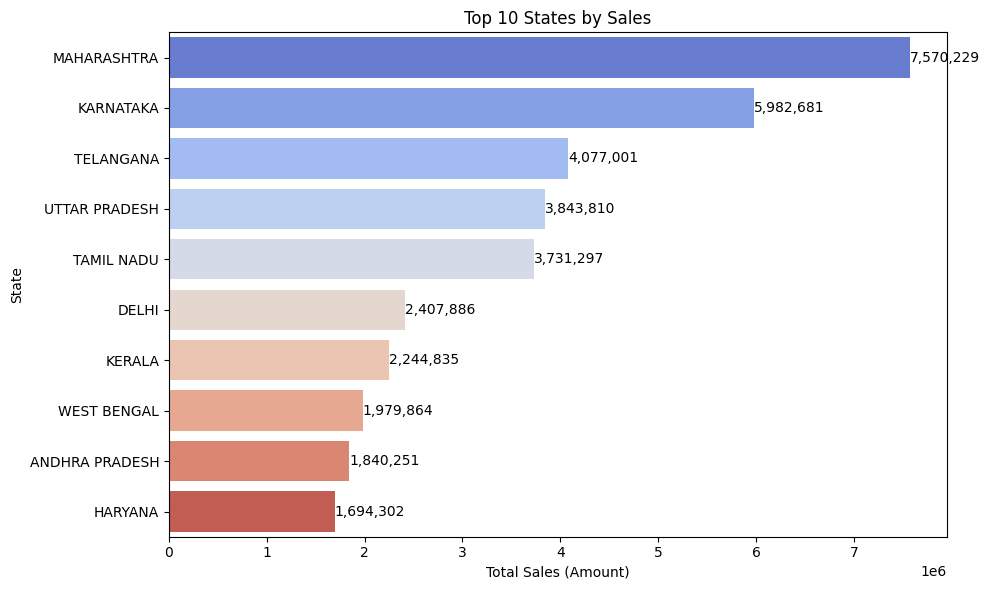

In [ ]:
# Limit to top 10 states for better clarity
top_states = state_sales.head(10)

# Plot with value labels and sorted states
plt.figure(figsize=(10, 6))
ax = sns.barplot(data=top_states, x='Amount', y='ship-state', palette='coolwarm')

# Add value labels on the bars
for index, value in enumerate(top_states['Amount']):
    ax.text(value, index, f'{value:,.0f}', va='center')

plt.title('Top 10 States by Sales')
plt.xlabel('Total Sales (Amount)')
plt.ylabel('State')
plt.tight_layout()
plt.show()